## Clone the Repository

In [ ]:
!git clone https://github.com/sovit-123/fastercnn-pytorch-training-pipeline.git

Cloning into 'fastercnn-pytorch-training-pipeline'...
remote: Enumerating objects: 1452, done.
remote: Counting objects: 100% (468/468), done.
remote: Compressing objects: 100% (146/146), done.
remote: Total 1452 (delta 371), reused 333 (delta 322), pack-reused 984 (from 2)
Receiving objects: 100% (1452/1452), 13.03 MiB | 23.50 MiB/s, done.
Resolving deltas: 100% (974/974), done.


In [ ]:
# Enter the repo directory.
%cd fastercnn-pytorch-training-pipeline/

/content/fastercnn-pytorch-training-pipeline


In [ ]:
# Install the Requirements
!pip install -r requirements.txt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.2/865.2 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 117.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 458.7/458.7 kB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 71.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 95.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.0/571.0 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.2/200.2 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1

## Download the Dataset

Here we are using the [Aquarium Dataset](https://public.roboflow.com/object-detection/aquarium) from Roboflow.

Download the unzip the dataset to `custom_data` directory.

In [ ]:
# !pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="ZACzFJOvzbToDyklrMEb")
# project = rf.workspace("ctufinalthesis").project("drowsinessdetectionyolov8-test2")
# version = project.version(9)
# dataset = version.download("voc")

In [ ]:
# !curl -L "https://public.roboflow.com/ds/CNyGy97q45?key=eSpwiC1Ah7" > roboflow.zip; unzip roboflow.zip -d custom_data; rm roboflow.zip

In [ ]:
!curl -L "https://universe.roboflow.com/ds/xReu2dBLp1?key=fRmKwival1" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/SGA2100588S0013IMG0004_jpg.rf.a2106a5da20db8f4e6dc1731d11ebb97.xml  
 extracting: train/SGA2100588S0013IMG0004_jpg.rf.c68cd1957e03f0030f341eb9a719e661.jpg  
  inflating: train/SGA2100588S0013IMG0004_jpg.rf.c68cd1957e03f0030f341eb9a719e661.xml  
 extracting: train/SGA2100588S0020IMG0004_jpg.rf.46111e6d2471f23f8c53fecf5818d0b9.jpg  
  inflating: train/SGA2100588S0020IMG0004_jpg.rf.46111e6d2471f23f8c53fecf5818d0b9.xml  
 extracting: train/SGA2100588S0020IMG0004_jpg.rf.4d7a8816b498ef2064123dfcc82f020a.jpg  
  inflating: train/SGA2100588S0020IMG0004_jpg.rf.4d7a8816b498ef2064123dfcc82f020a.xml  
 extracting: train/SGA2100588S0020IMG0004_jpg.rf.ffb48c56596f20823dae382c9628fde3.jpg  
  inflating: train/SGA2100588S0020IMG0004_jpg.rf.ffb48c56596f20823dae382c9628fde3.xml  
 extracting: train/SGA2100588S0022IMG0003_jpg.rf.7d97d85aa53bf78eec414db8b2e83b24.jpg  
  inflating: train/SGA2100588S0022IMG0003_jpg.rf.7d97d85aa53bf78eec41

## Create the Custom Dataset YAML File.

In [ ]:
pwd

'/content/fastercnn-pytorch-training-pipeline'

In [ ]:
%%writefile data_configs/custom_data.yaml
# Images and labels direcotry should be relative to train.py
TRAIN_DIR_IMAGES: '/content/fastercnn-pytorch-training-pipeline/train'
TRAIN_DIR_LABELS: '/content/fastercnn-pytorch-training-pipeline/train'
VALID_DIR_IMAGES: '/content/fastercnn-pytorch-training-pipeline/valid'
VALID_DIR_LABELS: '/content/fastercnn-pytorch-training-pipeline/valid'
TEST_DIR_IMAGES: '/content/fastercnn-pytorch-training-pipeline/test'
TEST_DIR_LABELS: '/content/fastercnn-pytorch-training-pipeline/test'


# Class names.
CLASSES: [
    '__background__',
    'Drowsy', 'Awake'
]

# Number of classes (object classes + 1 for background class in Faster RCNN).
NC: 3

# Whether to save the predictions of the validation set while training.
SAVE_VALID_PREDICTION_IMAGES: True

Writing data_configs/custom_data.yaml


In [ ]:
# # Images and labels directory should be relative to train.py
# %%writefile data_configs/custom_data.yaml
# # Images and labels directory should be relative to train.py
# TRAIN_DIR_IMAGES: '/content/fastercnn-pytorch-training-pipeline/train/images'
# TRAIN_DIR_LABELS: '/content/fastercnn-pytorch-training-pipeline/train/labels'

# VALID_DIR_IMAGES: '/content/fastercnn-pytorch-training-pipeline/valid/images'
# VALID_DIR_LABELS: '/content/fastercnn-pytorch-training-pipeline/valid/labels'

# TEST_DIR_IMAGES: '/content/fastercnn-pytorch-training-pipeline/test/images'
# TEST_DIR_LABELS: '/content/fastercnn-pytorch-training-pipeline/test/labels'

# # Class names (first is background).
# CLASSES: [
#     '__background__',
#     'Drowsy',
#     'Awake'
# ]

# # Number of classes (object classes + 1 for background class in Faster RCNN).
# NC: 3

# # Whether to save the predictions of the validation set while training.
# SAVE_VALID_PREDICTION_IMAGES: True


Overwriting data_configs/custom_data.yaml


In [ ]:
%%writefile /content/fastercnn-pytorch-training-pipeline/utils/transforms.py
import albumentations as A
import numpy as np
import cv2

from albumentations.pytorch import ToTensorV2
from torchvision import transforms as transforms

def resize(im, img_size=640, square=False):
    if square:
        im = cv2.resize(im, (img_size, img_size))
    else:
        h0, w0 = im.shape[:2]
        r = img_size / max(h0, w0)
        if r != 1:
            im = cv2.resize(im, (int(w0 * r), int(h0 * r)))
    return im

def get_train_aug():
    return A.Compose([
        A.OneOf([
            A.Blur(blur_limit=3, p=0.5),
            A.MotionBlur(blur_limit=3, p=0.5),
            A.MedianBlur(blur_limit=3, p=0.5),
        ], p=0.5),
        A.ToGray(p=0.1),
        A.RandomBrightnessContrast(p=0.1),
        A.ColorJitter(p=0.1),
        A.RandomGamma(p=0.1),
        ToTensorV2(p=1.0),
    ], bbox_params=A.BboxParams(
        format='pascal_voc',
        label_fields=['category_id'],
    ))

def get_train_transform():
    return A.Compose([
        ToTensorV2(p=1.0),
    ], bbox_params=A.BboxParams(
        format='pascal_voc',
        label_fields=['category_id'],
    ))

def get_valid_transform():
    return A.Compose([
        ToTensorV2(p=1.0),
    ], bbox_params=A.BboxParams(
        format='pascal_voc',
        label_fields=['category_id'],
    ))

def infer_transforms(image):
    transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.ToTensor(),
    ])
    return transform(image)

def transform_mosaic(mosaic, boxes, img_size=640):
    aug = A.Compose([
        A.Resize(img_size, img_size, always_apply=True, p=1.0)
    ])
    sample = aug(image=mosaic)
    resized_mosaic = sample['image']

    transformed_boxes = (np.array(boxes) / mosaic.shape[0]) * resized_mosaic.shape[1]
    for box in transformed_boxes:
        if box[2] - box[0] <= 1.0:
            box[2] += 1.0 - (box[2] - box[0])
            box[2] = min(box[2], float(resized_mosaic.shape[1]))
        if box[3] - box[1] <= 1.0:
            box[3] += 1.0 - (box[3] - box[1])
            box[3] = min(box[3], float(resized_mosaic.shape[0]))
    return resized_mosaic, transformed_boxes

Overwriting /content/fastercnn-pytorch-training-pipeline/utils/transforms.py


In [ ]:
%%writefile /content/fastercnn-pytorch-training-pipeline/datasets.py
import torch
import cv2
import numpy as np
import os
import glob as glob
import random

from xml.etree import ElementTree as et
from torch.utils.data import Dataset, DataLoader
from utils.transforms import (
    get_train_transform,
    get_valid_transform,
    get_train_aug,
    transform_mosaic
)
from tqdm.auto import tqdm

class CustomDataset(Dataset):
    def __init__(
        self,
        images_path,
        labels_path,
        img_size,
        classes,
        transforms=None,
        use_train_aug=False,
        train=False,
        mosaic=1.0,
        square_training=False,
        label_type='pascal_voc'
    ):
        self.transforms = transforms
        self.use_train_aug = use_train_aug
        self.images_path = images_path
        self.labels_path = labels_path
        self.img_size = img_size
        self.classes = classes
        self.train = train
        self.square_training = square_training
        self.mosaic_border = [-img_size // 2, -img_size // 2]
        self.image_file_types = ['*.jpg', '*.jpeg', '*.png', '*.ppm', '*.JPG']
        self.all_image_paths = []
        self.log_annot_issue_x = True
        self.mosaic = mosaic
        self.log_annot_issue_y = True
        self.label_type = label_type

        for file_type in self.image_file_types:
            self.all_image_paths.extend(glob.glob(os.path.join(self.images_path, file_type)))
        self.all_annot_paths = glob.glob(os.path.join(self.labels_path, '*.xml'))
        self.all_images = sorted([os.path.basename(p) for p in self.all_image_paths])
        if self.label_type == 'pascal_voc':
            self.read_and_clean()

    def read_and_clean(self):
        print('Checking Labels and images...')
        images_to_remove = []
        problematic_images = []

        for image_name in tqdm(self.all_images):
            possible_annot_name = os.path.join(self.labels_path, os.path.splitext(image_name)[0]+'.xml')
            if possible_annot_name not in self.all_annot_paths:
                print(f"⚠️ {possible_annot_name} not found... Removing {image_name}")
                images_to_remove.append(image_name)
                continue

            tree = et.parse(possible_annot_name)
            root = tree.getroot()
            invalid_bbox = False
            for member in root.findall('object'):
                xmin = float(member.find('bndbox').find('xmin').text)
                xmax = float(member.find('bndbox').find('xmax').text)
                ymin = float(member.find('bndbox').find('ymin').text)
                ymax = float(member.find('bndbox').find('ymax').text)
                if xmin >= xmax or ymin >= ymax:
                    invalid_bbox = True
                    break
            if invalid_bbox:
                problematic_images.append(image_name)
                images_to_remove.append(image_name)

        self.all_images = [img for img in self.all_images if img not in images_to_remove]
        self.all_annot_paths = [path for path in self.all_annot_paths
                                if os.path.splitext(os.path.basename(path))[0] not in [os.path.splitext(x)[0] for x in images_to_remove]]

        if problematic_images:
            print("\n⚠️ The following images have invalid bounding boxes and will be removed:")
            for img in problematic_images:
                print(f"⚠️ {img}")
        print(f"Removed {len(images_to_remove)} problematic images and annotations.")

    def resize(self, im, square=False):
        if square:
            return cv2.resize(im, (self.img_size, self.img_size))
        h0, w0 = im.shape[:2]
        r = self.img_size / max(h0, w0)
        if r != 1:
            im = cv2.resize(im, (int(w0 * r), int(h0 * r)))
        return im

    def load_image_and_labels(self, index):
        image_name = self.all_images[index]
        image_path = os.path.join(self.images_path, image_name)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)
        image_resized = self.resize(image, square=self.square_training)
        image_resized /= 255.0

        if self.label_type == 'pascal_voc':
            return self.load_pascal_voc(image, image_name, image_resized)
        elif self.label_type == 'yolo':
            return self.load_yolo(image, image_name, image_resized)

    def load_pascal_voc(self, image, image_name, image_resized):
        annot_file = os.path.join(self.labels_path, os.path.splitext(image_name)[0] + '.xml')
        boxes, orig_boxes, labels = [], [], []
        h, w = image.shape[:2]

        tree = et.parse(annot_file)
        root = tree.getroot()
        for obj in root.findall('object'):
            labels.append(self.classes.index(obj.find('name').text))
            bnd = obj.find('bndbox')
            xmin, xmax = float(bnd.find('xmin').text), float(bnd.find('xmax').text)
            ymin, ymax = float(bnd.find('ymin').text), float(bnd.find('ymax').text)
            xmin, ymin, xmax, ymax = self.check_image_and_annotation(xmin, ymin, xmax, ymax, w, h, True)
            orig_boxes.append([xmin, ymin, xmax, ymax])
            xmin, ymin, xmax, ymax = [coord * scale for coord, scale in zip(
                [xmin/w, ymin/h, xmax/w, ymax/h],
                [image_resized.shape[1], image_resized.shape[0], image_resized.shape[1], image_resized.shape[0]]
            )]
            xmin, ymin, xmax, ymax = self.check_image_and_annotation(xmin, ymin, xmax, ymax, image_resized.shape[1], image_resized.shape[0])
            boxes.append([xmin, ymin, xmax, ymax])

        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        area = (boxes[:, 2] - boxes[:, 0]) * (boxes[:, 3] - boxes[:, 1]) if len(boxes) > 0 else torch.as_tensor(boxes)
        iscrowd = torch.zeros((boxes.shape[0],), dtype=torch.int64) if len(boxes) > 0 else torch.as_tensor(boxes)
        labels = torch.as_tensor(labels, dtype=torch.int64)

        return image, image_resized, orig_boxes, boxes, labels, area, iscrowd, (w, h)

    def check_image_and_annotation(self, xmin, ymin, xmax, ymax, width, height, orig_data=False):
        xmax = min(xmax, width)
        ymax = min(ymax, height)
        if xmax - xmin <= 1.0:
            xmin -= 1
        if ymax - ymin <= 1.0:
            ymin -= 1
        return xmin, ymin, xmax, ymax

    def load_cutmix_image_and_boxes(self, index):
        s = self.img_size
        yc, xc = [int(random.uniform(-x, 2 * s + x)) for x in self.mosaic_border]
        indices = [index] + [random.randint(0, len(self.all_images) - 1) for _ in range(3)]
        result_boxes, result_classes = [], []

        for i, idx in enumerate(indices):
            _, image_resized, _, boxes, labels, area, iscrowd, dims = self.load_image_and_labels(idx)
            h, w = image_resized.shape[:2]
            result_image = result_image if i != 0 else np.full((s * 2, s * 2, 3), 114/255, dtype=np.float32)
            x1a, y1a, x2a, y2a, x1b, y1b, x2b, y2b = self._get_coords(i, xc, yc, w, h, s)
            result_image[y1a:y2a, x1a:x2a] = image_resized[y1b:y2b, x1b:x2b]
            padw, padh = x1a - x1b, y1a - y1b

            if len(boxes) > 0:
                boxes[:, [0, 2]] += padw
                boxes[:, [1, 3]] += padh
                result_boxes.append(boxes)
                result_classes += labels

        final_boxes = np.concatenate(result_boxes, 0) if result_boxes else np.zeros((0, 4))
        final_boxes = np.clip(final_boxes, 0, 2 * s).astype(np.int32)
        final_classes = [result_classes[i] for i in range(len(final_boxes)) if (final_boxes[i, 2] - final_boxes[i, 0]) * (final_boxes[i, 3] - final_boxes[i, 1]) > 0]
        final_boxes = final_boxes[np.where((final_boxes[:, 2] - final_boxes[:, 0]) * (final_boxes[:, 3] - final_boxes[:, 1]) > 0)]
        result_image, final_boxes = transform_mosaic(result_image, final_boxes, self.img_size)

        return result_image, torch.tensor(final_boxes), torch.tensor(final_classes), area, iscrowd, dims

    def _get_coords(self, i, xc, yc, w, h, s):
        if i == 0:
            return max(xc - w, 0), max(yc - h, 0), xc, yc, w - (xc - max(xc - w, 0)), h - (yc - max(yc - h, 0)), w, h
        elif i == 1:
            return xc, max(yc - h, 0), min(xc + w, 2 * s), yc, 0, h - (yc - max(yc - h, 0)), min(w, min(xc + w, 2 * s) - xc), h
        elif i == 2:
            return max(xc - w, 0), yc, xc, min(2 * s, yc + h), w - (xc - max(xc - w, 0)), 0, max(xc, w), min(min(2 * s, yc + h) - yc, h)
        elif i == 3:
            return xc, yc, min(xc + w, 2 * s), min(yc + h, 2 * s), 0, 0, min(w, min(xc + w, 2 * s) - xc), min(min(yc + h, 2 * s) - yc, h)

    def __getitem__(self, idx):
        if self.train:
            if random.uniform(0.0, 1.0) < self.mosaic:
                image_resized, boxes, labels, area, iscrowd, dims = self.load_cutmix_image_and_boxes(idx)
            else:
                _, image_resized, _, boxes, labels, area, iscrowd, dims = self.load_image_and_labels(idx)
        else:
            _, image_resized, _, boxes, labels, area, iscrowd, dims = self.load_image_and_labels(idx)

        target = {
            "boxes": boxes,
            "labels": labels,
            "area": area,
            "iscrowd": iscrowd,
            "image_id": torch.tensor([idx])
        }

        labels_np = labels.cpu().numpy().tolist()
        bboxes = boxes.cpu().numpy().tolist()

        transform_func = get_train_aug() if self.use_train_aug else self.transforms
        sample = transform_func(image=image_resized, bboxes=bboxes, category_id=labels_np)
        image_resized = sample['image']
        target['boxes'] = torch.tensor(sample['bboxes'], dtype=torch.float32)

        if target['boxes'].shape[0] == 0 or np.isnan(target['boxes'].numpy()).any():
            target['boxes'] = torch.zeros((0, 4), dtype=torch.float32)

        return image_resized, target

    def __len__(self):
        return len(self.all_images)

def collate_fn(batch):
    return tuple(zip(*batch))

def create_train_dataset(train_dir_images, train_dir_labels, img_size, classes, use_train_aug=False, mosaic=1.0, square_training=False, label_type='pascal_voc'):
    return CustomDataset(train_dir_images, train_dir_labels, img_size, classes, get_train_transform(), use_train_aug, True, mosaic, square_training, label_type)

def create_valid_dataset(valid_dir_images, valid_dir_labels, img_size, classes, square_training=False, label_type='pascal_voc'):
    return CustomDataset(valid_dir_images, valid_dir_labels, img_size, classes, get_valid_transform(), False, False, 0.0, square_training, label_type)

def create_train_loader(train_dataset, batch_size, num_workers=0, batch_sampler=None):
    return DataLoader(train_dataset, batch_size=batch_size, num_workers=num_workers, collate_fn=collate_fn, sampler=batch_sampler)

def create_valid_loader(valid_dataset, batch_size, num_workers=0, batch_sampler=None):
    return DataLoader(valid_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers, collate_fn=collate_fn, sampler=batch_sampler)


Overwriting /content/fastercnn-pytorch-training-pipeline/datasets.py


## Training

In [ ]:
!python train.py --data data_configs/custom_data.yaml --epochs 1 --model fasterrcnn_resnet50_fpn_v2 --name custom_training --batch 8 --workers 2

2025-06-25 10:22:04.795460: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750846924.830695    5516 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750846924.843064    5516 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-25 10:22:04.878413: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Not using distributed mode
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize 

## Visualize Validation Results

In [ ]:
import matplotlib.pyplot as plt
import glob as glob

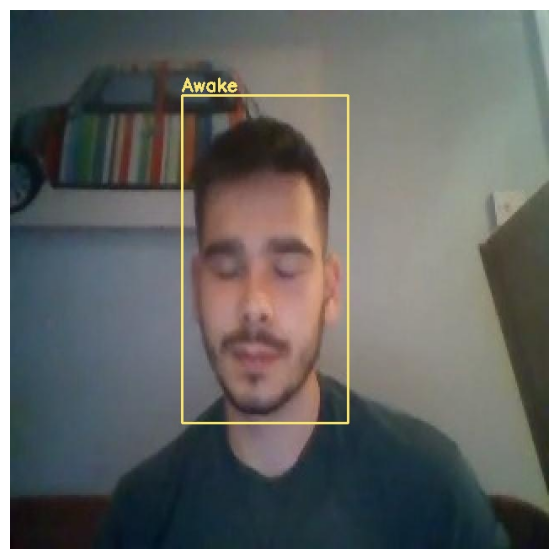

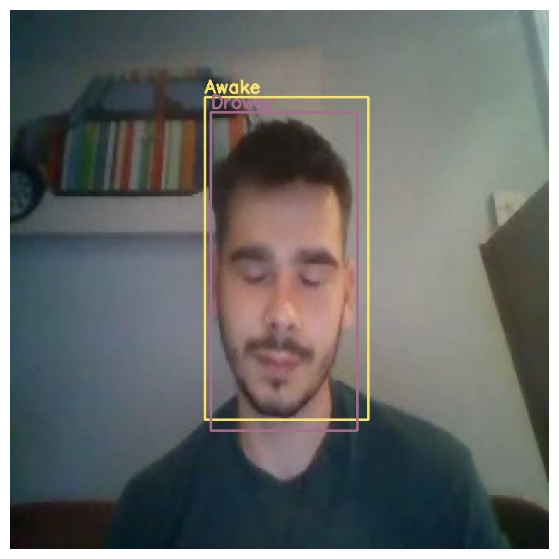

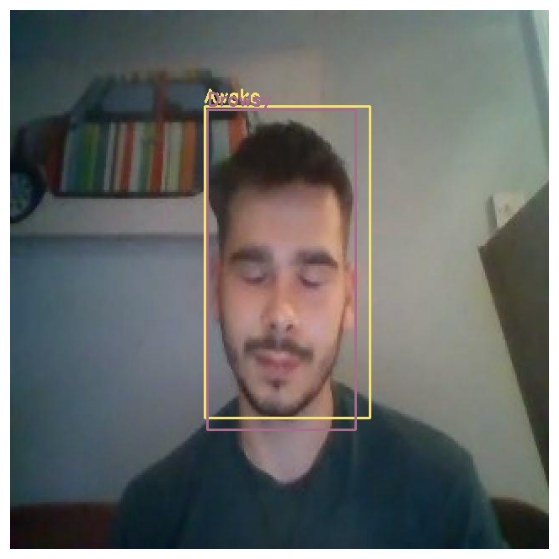

In [ ]:
results_dir_path = '/content/fastercnn-pytorch-training-pipeline/outputs/training/custom_training'
valid_images = glob.glob(f"{results_dir_path}/*.jpg")

for i in range(3):
    plt.figure(figsize=(10, 7))
    image = plt.imread(valid_images[i])
    plt.imshow(image)
    plt.axis('off')
    plt.show()

Check Out the Repo for Latest Updates
https://github.com/sovit-123/fastercnn-pytorch-training-pipeline

## Evaluation

In [ ]:
%%writefile /content/fastercnn-pytorch-training-pipeline/eval.py
from datasets import (
    create_valid_dataset, create_valid_loader
)
from models.create_fasterrcnn_model import create_model
from torch_utils import utils
from torchmetrics.detection.mean_ap import MeanAveragePrecision
from torch_utils.engine import evaluate as coco_evaluate
from torch_utils.coco_utils import get_coco_api_from_dataset
from torch_utils.coco_eval import CocoEvaluator
from pprint import pprint
from tqdm import tqdm

import torch
import argparse
import yaml
import time
import numpy as np

torch.multiprocessing.set_sharing_strategy('file_system')

def get_iou_types(model):
    model_without_ddp = model
    iou_types = ["bbox"]
    if hasattr(model_without_ddp, "mask_head") and model_without_ddp.mask_head is not None:
        iou_types.append("segm")
    if hasattr(model_without_ddp, "keypoint_head") and model_without_ddp.keypoint_head is not None:
        iou_types.append("keypoints")
    return iou_types

if __name__ == '__main__':
    parser = argparse.ArgumentParser()
    parser.add_argument('--data', default='data_configs/test_image_config.yaml')
    parser.add_argument('-m', '--model', default='fasterrcnn_resnet50_fpn')
    parser.add_argument('-mw', '--weights', default=None)
    parser.add_argument('-ims', '--imgsz', default=640, type=int)
    parser.add_argument('-w', '--workers', default=4, type=int)
    parser.add_argument('-b', '--batch', default=8, type=int)
    parser.add_argument('-d', '--device', default=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu'))
    parser.add_argument('-v', '--verbose', action='store_true')
    parser.add_argument('-st', '--square-training', dest='square_training', action='store_true')
    args = vars(parser.parse_args())

    with open(args['data']) as file:
        data_configs = yaml.safe_load(file)

    try:
        VALID_DIR_IMAGES = data_configs['TEST_DIR_IMAGES']
        VALID_DIR_LABELS = data_configs['TEST_DIR_LABELS']
    except:
        VALID_DIR_IMAGES = data_configs['VALID_DIR_IMAGES']
        VALID_DIR_LABELS = data_configs['VALID_DIR_LABELS']

    NUM_CLASSES = data_configs['NC']
    CLASSES = data_configs['CLASSES']
    NUM_WORKERS = args['workers']
    DEVICE = args['device']
    BATCH_SIZE = args['batch']
    IMAGE_SIZE = args['imgsz']

    create_model_fn = create_model[args['model']]
    if args['weights'] is None:
        try:
            model, coco_model = create_model_fn(num_classes=NUM_CLASSES, coco_model=True)
        except:
            model = create_model_fn(num_classes=NUM_CLASSES, coco_model=True)
        if coco_model:
            COCO_91_CLASSES = data_configs['COCO_91_CLASSES']
            valid_dataset = create_valid_dataset(
                VALID_DIR_IMAGES,
                VALID_DIR_LABELS,
                IMAGE_SIZE,
                COCO_91_CLASSES,
                square_training=args['square_training']
            )

    if args['weights'] is not None:
        model = create_model_fn(num_classes=NUM_CLASSES, coco_model=False)
        checkpoint = torch.load(args['weights'], map_location=DEVICE)
        model.load_state_dict(checkpoint['model_state_dict'])
        valid_dataset = create_valid_dataset(
            VALID_DIR_IMAGES,
            VALID_DIR_LABELS,
            IMAGE_SIZE,
            CLASSES,
            square_training=args['square_training']
        )

    model.to(DEVICE).eval()
    valid_loader = create_valid_loader(valid_dataset, BATCH_SIZE, NUM_WORKERS)

    @torch.inference_mode()
    def evaluate(model, data_loader, device, out_dir=None, classes=None, colors=None):
        coco = get_coco_api_from_dataset(data_loader.dataset)
        iou_types = get_iou_types(model)
        coco_evaluator = CocoEvaluator(coco, iou_types)

        torchmetric_eval = MeanAveragePrecision(class_metrics=args['verbose'])

        cpu_device = torch.device("cpu")
        model.eval()

        target = []
        preds = []

        for images, targets in tqdm(data_loader, total=len(data_loader)):
            images = [img.to(device) for img in images]
            with torch.no_grad():
                outputs = model(images)

            res = {t["image_id"].item(): o for t, o in zip(targets, outputs)}
            coco_evaluator.update(res)

            for i in range(len(images)):
                true_dict = {
                    "boxes": targets[i]["boxes"].cpu(),
                    "labels": targets[i]["labels"].cpu(),
                }
                pred_dict = {
                    "boxes": outputs[i]["boxes"].cpu(),
                    "scores": outputs[i]["scores"].cpu(),
                    "labels": outputs[i]["labels"].cpu(),
                }
                preds.append(pred_dict)
                target.append(true_dict)

        coco_evaluator.synchronize_between_processes()
        coco_evaluator.accumulate()
        coco_evaluator.summarize()

        torchmetric_eval.update(preds, target)
        stats = torchmetric_eval.compute()
        return stats

    stats = evaluate(
        model,
        valid_loader,
        device=DEVICE,
        classes=CLASSES,
    )

    print('\n')
    pprint(stats)
    if args['verbose']:
        print('\n')
        pprint(f"Classes: {CLASSES}")
        print('\n')
        print('AP / AR per class')
        empty_string = ''
        if len(CLASSES) > 2:
            num_hyphens = 73
            print('-'*num_hyphens)
            print(f"|    | Class{empty_string:<16}| AP{empty_string:<18}| AR{empty_string:<18}|")
            print('-'*num_hyphens)
            for i in range(len(CLASSES)-1):
                print(f"|{i+1:<3} | {CLASSES[i+1]:<20} | {np.array(stats['map_per_class'][i]):.3f}{empty_string:<15}| {np.array(stats['mar_100_per_class'][i]):.3f}{empty_string:<15}|")
            print('-'*num_hyphens)
            print(f"|Avg{empty_string:<23} | {np.array(stats['map']):.3f}{empty_string:<15}| {np.array(stats['mar_100']):.3f}{empty_string:<15}|")
        else:
            num_hyphens = 62
            print('-'*num_hyphens)
            print(f"|Class{empty_string:<10} | AP{empty_string:<18}| AR{empty_string:<18}|")
            print('-'*num_hyphens)
            print(f"|{CLASSES[1]:<15} | {np.array(stats['map']):.3f}{empty_string:<15}| {np.array(stats['mar_100']):.3f}{empty_string:<15}|")
            print('-'*num_hyphens)
            print(f"|Avg{empty_string:<12} | {np.array(stats['map']):.3f}{empty_string:<15}| {np.array(stats['mar_100']):.3f}{empty_string:<15}|")

Overwriting /content/fastercnn-pytorch-training-pipeline/eval.py


In [ ]:
! ls /content/fastercnn-pytorch-training-pipeline/test/images
! ls /content/fastercnn-pytorch-training-pipeline/test/labels


ls: cannot access '/content/fastercnn-pytorch-training-pipeline/test/images': No such file or directory
ls: cannot access '/content/fastercnn-pytorch-training-pipeline/test/labels': No such file or directory


In [ ]:
# No verbose mAP.
!python eval.py --weights outputs/training/custom_training/best_model.pth --data data_configs/custom_data.yaml --model fasterrcnn_resnet50_fpn_v2

2025-06-25 11:13:24.470081: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750850004.490398   18635 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750850004.496495   18635 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-25 11:13:24.516453: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/local/lib/python3.11/dist-packages/albumentations/core/composition.py:331: UserWarning: Got processor for bboxes, but no

In [ ]:
# Verbose mAP.
!python eval.py --weights outputs/training/custom_training/best_model.pth --data data_configs/custom_data.yaml --model fasterrcnn_resnet50_fpn_v2 --verbose

2025-06-25 11:26:22.390834: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750850782.411482   21975 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750850782.417630   21975 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-25 11:26:22.438063: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/local/lib/python3.11/dist-packages/albumentations/core/composition.py:331: UserWarning: Got processor for bboxes, but no